Number of images in the reduced training dataset: 6000
Number of images in the reduced testing dataset: 1000
___________________

There are 10 unique classes in the reduced training dataset
Breakdown of each label is below (format: dict key is label, dict value is occurrence of that label/number of images for that label)
Counter({0: 600, 1: 600, 2: 600, 3: 600, 4: 600, 5: 600, 6: 600, 7: 600, 8: 600, 9: 600})

There are 10 unique classes in the reduced testing dataset
Breakdown of each label is below (format: dict key is label, dict value is occurrence of that label/number of images for that label)
Counter({0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 100, 8: 100, 9: 100})

Randomly printing 10 images with labels from the reduced training dataset
Index: 1289
Label: 2


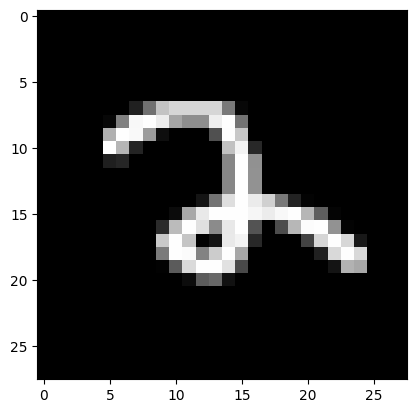

Index: 987
Label: 1


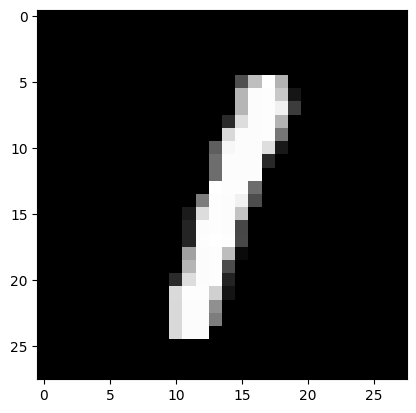

Index: 2668
Label: 4


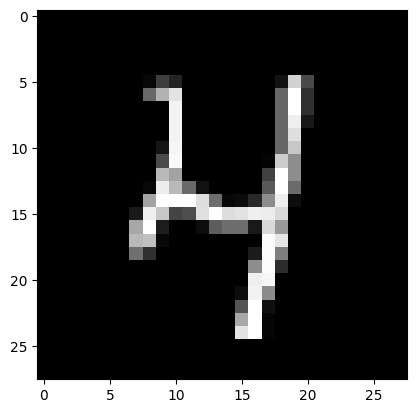

Index: 5982
Label: 9


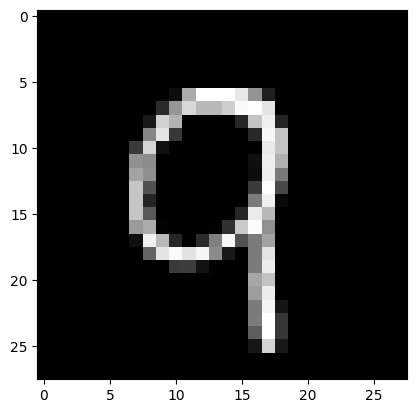

Index: 5290
Label: 8


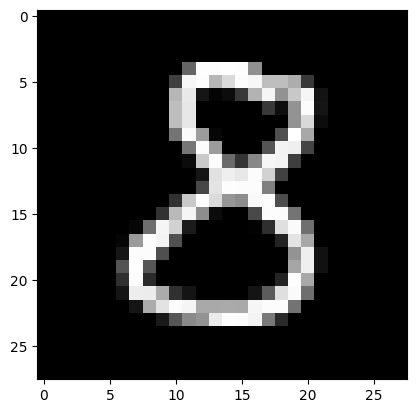

Index: 2746
Label: 4


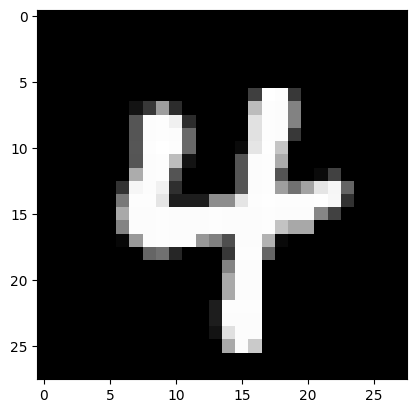

Index: 736
Label: 1


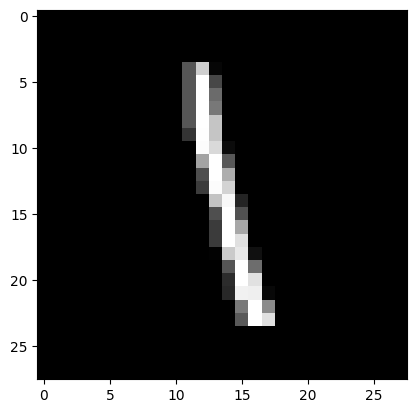

Index: 4089
Label: 6


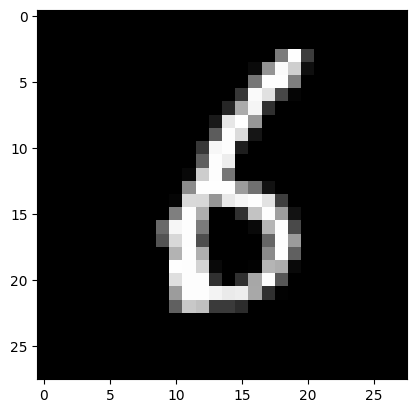

Index: 362
Label: 0


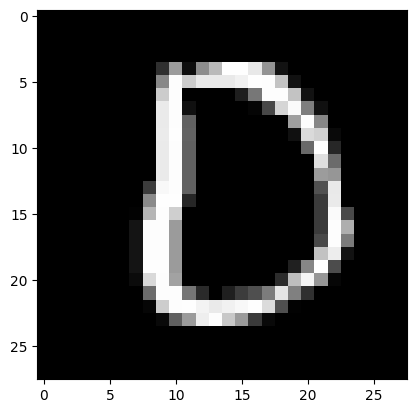

Index: 5585
Label: 9


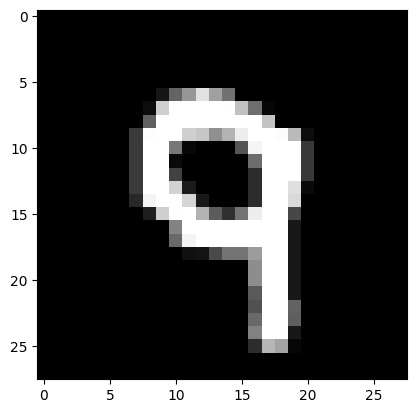

In [2]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def display_random_images_with_labels(d, n=10):
    """
    Display n random images with labels from the given dataset.

    Parameters:
        d (tuple): Dataset containing images (index 0) and labels (index 1).
        n (int): Number of samples to display (default: 10).

    Returns:
        None
    """
    choices = list(range(len(d[0])))
    for i in range(n):
        index = random.choice(choices)
        choices.remove(index)
        print("Index:", index)
        print("Label:", d[1][index])
        plt.imshow(d[0][index], cmap='gray')
        plt.show()

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Initialize lists to store indices for each digit
indices_per_digit_train = [[] for _ in range(10)]
indices_per_digit_test = [[] for _ in range(10)]

# Populate lists with indices for each digit
for i, label in enumerate(train_labels):
    indices_per_digit_train[label].append(i)

for i, label in enumerate(test_labels):
    indices_per_digit_test[label].append(i)

# Reduce the size of the training dataset to 6000 samples (600 samples per digit)
reduced_indices_train = [random.sample(indices, 600) for indices in indices_per_digit_train]
reduced_indices_train_flat = [index for sublist in reduced_indices_train for index in sublist]
train_images_reduced = train_images[reduced_indices_train_flat]
train_labels_reduced = train_labels[reduced_indices_train_flat]

# Reduce the size of the testing dataset to 1000 samples (100 samples per digit)
reduced_indices_test = [random.sample(indices, 100) for indices in indices_per_digit_test]
reduced_indices_test_flat = [index for sublist in reduced_indices_test for index in sublist]
test_images_reduced = test_images[reduced_indices_test_flat]
test_labels_reduced = test_labels[reduced_indices_test_flat]

# Display information about the reduced datasets
print("Number of images in the reduced training dataset:", len(train_images_reduced))
print("Number of images in the reduced testing dataset:", len(test_images_reduced))
print("___________________\n")

# Display unique classes and their occurrence in the reduced training dataset
print("There are 10 unique classes in the reduced training dataset")
print("Breakdown of each label is below (format: dict key is label, dict value is occurrence of that label/number of images for that label)")
counter_train = Counter(train_labels_reduced)
print("Counter(" + str(dict(counter_train)) + ")\n")

# Display unique classes and their occurrence in the reduced testing dataset
print("There are 10 unique classes in the reduced testing dataset")
print("Breakdown of each label is below (format: dict key is label, dict value is occurrence of that label/number of images for that label)")
counter_test = Counter(test_labels_reduced)
print("Counter(" + str(dict(counter_test)) + ")\n")

# Display random images with labels from the reduced training dataset
print("Randomly printing 10 images with labels from the reduced training dataset")
display_random_images_with_labels((train_images_reduced, train_labels_reduced), n=10)